In [1]:
import pandas as pd             # tabular data management, processing
import numpy as np              # computing module
import matplotlib.pyplot as plt # data visualization
from matplotlib.legend_handler import HandlerLine2D 
import seaborn as sns           # data visualization

from collections import Counter # counting hashable objects in the container datatypes such as list, dict

from wordcloud import WordCloud, STOPWORDS # Text data visualization method (https://en.wikipedia.org/wiki/Tag_cloud)
stopwords = set(STOPWORDS)

# Module for converting a collection of text documents to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Module for encoding laber
from sklearn.preprocessing import LabelEncoder

# Module for splitting the data for validation stage
from sklearn.model_selection import train_test_split 

# Import RandomForestClassifier class
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# Module for making the report on the trained model
from sklearn.metrics import classification_report

# Visualize the tree
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus

%matplotlib inline

In [2]:
# Utils functions
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud) # visualize word cloud
    plt.show()
    
def explore_max_depth(x_train,x_test,y_train,y_test):
  max_depths = np.linspace(1, 32, 32, endpoint=True)
  train_results = []
  test_results = []
  for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(x_train, y_train)

    score_train = dt.score(x_train,y_train)
    score_test = dt.score(x_test,y_test)

    train_results.append(score_train)
    test_results.append(score_test)

  
  line1, = plt.plot(max_depths, train_results, 'b', label="Train Accuracy")
  line2, = plt.plot(max_depths, test_results, 'r', label="Test Accuracy")
  plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
  plt.ylabel('Accuracy')
  plt.xlabel('Tree depth')
  plt.show()
  
def jupyter_graphviz(m, **kwargs):
    dot_data = StringIO()
    export_graphviz(m, dot_data, **kwargs)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    display(Image(graph.create_png()))

In [3]:
train = pd.read_json('./whats-cooking/train.json')

ValueError: Expected object or value

In [4]:
train = pd.read_json('./notebooks/whats-cooking/train.json')

In [5]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [6]:
train.shape

(39774, 3)

In [7]:
train

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."
5,jamaican,6602,"[plain flour, sugar, butter, eggs, fresh ginge..."
6,spanish,42779,"[olive oil, salt, medium shrimp, pepper, garli..."
7,italian,3735,"[sugar, pistachio nuts, white almond bark, flo..."
8,mexican,16903,"[olive oil, purple onion, fresh pineapple, por..."
9,italian,12734,"[chopped tomatoes, fresh basil, garlic, extra-..."


In [8]:
train.isnull().sum().sort_values(ascending = False)

ingredients    0
id             0
cuisine        0
dtype: int64

In [9]:
train['cuisine'].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [10]:
print(train)

            cuisine     id                                        ingredients
0             greek  10259  [romaine lettuce, black olives, grape tomatoes...
1       southern_us  25693  [plain flour, ground pepper, salt, tomatoes, g...
2          filipino  20130  [eggs, pepper, salt, mayonaise, cooking oil, g...
3            indian  22213                [water, vegetable oil, wheat, salt]
4            indian  13162  [black pepper, shallots, cornflour, cayenne pe...
5          jamaican   6602  [plain flour, sugar, butter, eggs, fresh ginge...
6           spanish  42779  [olive oil, salt, medium shrimp, pepper, garli...
7           italian   3735  [sugar, pistachio nuts, white almond bark, flo...
8           mexican  16903  [olive oil, purple onion, fresh pineapple, por...
9           italian  12734  [chopped tomatoes, fresh basil, garlic, extra-...
10          italian   5875  [pimentos, sweet pepper, dried oregano, olive ...
11          chinese  45887  [low sodium soy sauce, fresh ginger,

In [11]:
temp = train['cuisine'].value_counts() 

In [12]:
print(temp)

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64


In [13]:
df_temp = temp.to_frame().reset_index()

In [14]:
print(df_temp)

           index  cuisine
0        italian     7838
1        mexican     6438
2    southern_us     4320
3         indian     3003
4        chinese     2673
5         french     2646
6   cajun_creole     1546
7           thai     1539
8       japanese     1423
9          greek     1175
10       spanish      989
11        korean      830
12    vietnamese      825
13      moroccan      821
14       british      804
15      filipino      755
16         irish      667
17      jamaican      526
18       russian      489
19     brazilian      467


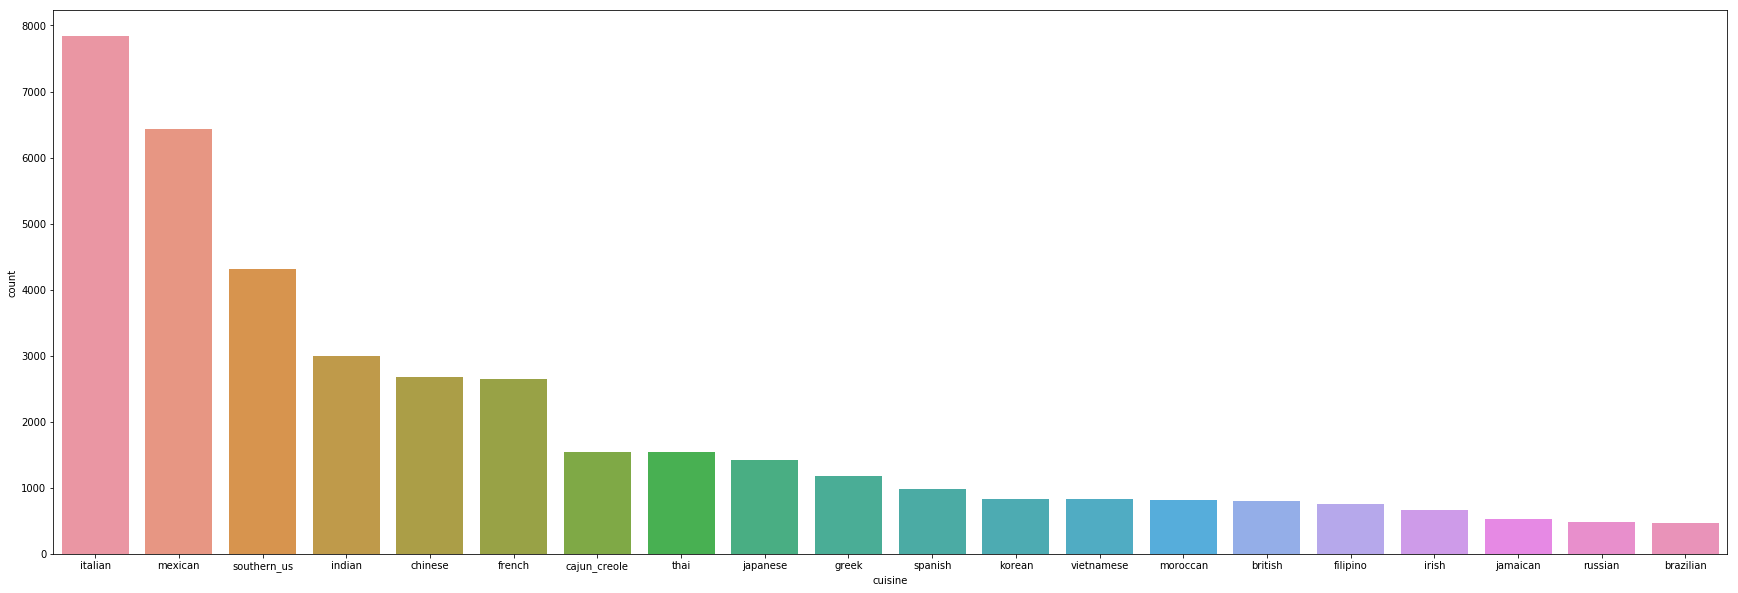

In [15]:
plt.figure(figsize=(30, 10)) 
sns.countplot(x='cuisine',data=train,order=train['cuisine'].value_counts().index)

In [16]:
counters = {}

for cuisine in train['cuisine'].unique():
  counters[cuisine] = Counter()
  for ingredients in train[train['cuisine'] == cuisine]['ingredients']:
    counters[cuisine].update(ingredients)

In [18]:
counters['japanese']

Counter({'sirloin': 2,
         'mirin': 402,
         'yellow onion': 21,
         'low sodium soy sauce': 64,
         'water': 383,
         'corn oil': 3,
         'sugar': 401,
         'green onions': 175,
         'glass noodles': 3,
         'sake': 289,
         'shiitake': 69,
         'napa cabbage': 28,
         'melted butter': 4,
         'matcha green tea powder': 10,
         'white sugar': 60,
         'milk': 52,
         'all-purpose flour': 69,
         'eggs': 144,
         'salt': 422,
         'baking powder': 39,
         'chopped walnuts': 1,
         'top round steak': 1,
         'vegetable oil': 245,
         'soy sauce': 561,
         'fresh asparagus': 1,
         'prawns': 12,
         'rice flour': 8,
         'seasoning salt': 3,
         'club soda': 2,
         'garlic powder': 15,
         'cayenne pepper': 22,
         'pepper': 62,
         'panko breadcrumbs': 39,
         'plain flour': 13,
         'oil': 146,
         'steak': 3,
         'grou

In [19]:
top10 = pd.DataFrame([[items[0] for items in counters[cuisine].most_common(10)] for cuisine in counters],
                     index = [cuisine for cuisine in counters],
                     columns = ['top{}'.format(i) for i in range(1,11)])
top10.head(10)

,top1,top2,top3,top4,top5,top6,top7,top8,top9,top10
greek,salt,olive oil,dried oregano,garlic cloves,feta cheese crumbles,extra-virgin olive oil,fresh lemon juice,ground black pepper,garlic,pepper
southern_us,salt,butter,all-purpose flour,sugar,large eggs,baking powder,water,unsalted butter,milk,buttermilk
filipino,salt,garlic,water,onions,soy sauce,pepper,oil,sugar,carrots,ground black pepper
indian,salt,onions,garam masala,water,ground turmeric,garlic,cumin seed,ground cumin,vegetable oil,oil
jamaican,salt,onions,water,garlic,ground allspice,pepper,scallions,dried thyme,black pepper,garlic cloves
spanish,salt,olive oil,garlic cloves,extra-virgin olive oil,onions,water,tomatoes,ground black pepper,red bell pepper,pepper
italian,salt,olive oil,garlic cloves,grated parmesan cheese,garlic,ground black pepper,extra-virgin olive oil,onions,water,butter
mexican,salt,onions,ground cumin,garlic,olive oil,chili powder,jalapeno chilies,sour cream,avocado,corn tortillas
chinese,soy sauce,sesame oil,salt,corn starch,sugar,garlic,water,green onions,vegetable oil,scallions
british,salt,all-purpose flour,butter,milk,eggs,unsalted butter,sugar,onions,baking powder,large eggs


In [20]:
print(top10)

                    top1               top2               top3  \
greek               salt          olive oil      dried oregano   
southern_us         salt             butter  all-purpose flour   
filipino            salt             garlic              water   
indian              salt             onions       garam masala   
jamaican            salt             onions              water   
spanish             salt          olive oil      garlic cloves   
italian             salt          olive oil      garlic cloves   
mexican             salt             onions       ground cumin   
chinese        soy sauce         sesame oil               salt   
british             salt  all-purpose flour             butter   
thai          fish sauce             garlic               salt   
vietnamese    fish sauce              sugar               salt   
cajun_creole        salt             onions             garlic   
brazilian           salt             onions          olive oil   
french    

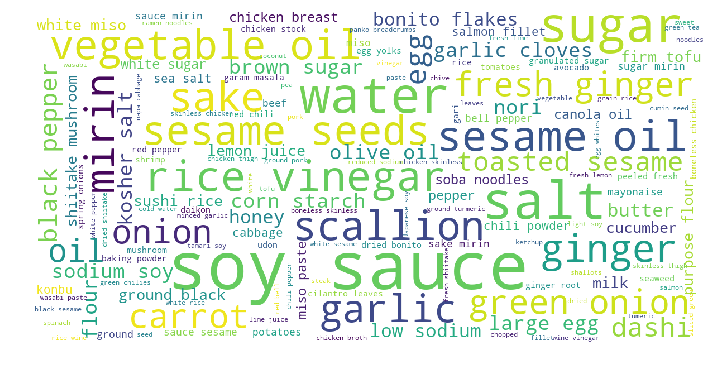

In [21]:
# Create list of ingredients in japanese cuisine
ls_of_ingredients = []

for ingredients in train[train['cuisine'] == 'japanese']['ingredients']:
  ls_of_ingredients = ls_of_ingredients + ingredients
  
# Join all ingredients into one document for Japanese's cuisine
doc = ' '.join(ls_of_ingredients) 

# Visualize it by wordcloud (bigger word means more frequent ingredient)
show_wordcloud(doc)

In [22]:
word_train = [' '.join(x) for x in train['ingredients']]

In [24]:
print(word_train)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [27]:
vec = CountVectorizer(max_features=1000)

bag_of_word = vec.fit(word_train)

df_vec_train = pd.DataFrame(bag_of_word.transform(word_train).toarray(),columns=vec.get_feature_names())
df_train = pd.concat([train,df_vec_train],axis=1).drop('ingredients',axis=1)

In [29]:
print(df_train.head())

       cuisine     id  active  added  adobo  agave  ale  alfredo  all  \
0        greek  10259       0      0      0      0    0        0    0   
1  southern_us  25693       0      0      0      0    0        0    0   
2     filipino  20130       0      0      0      0    0        0    0   
3       indian  22213       0      0      0      0    0        0    0   
4       indian  13162       0      0      0      0    0        0    0   

   allspice    ...     yams  yeast  yellow  yoghurt  yogurt  yolks  yukon  \
0         0    ...        0      0       0        0       0      0      0   
1         0    ...        0      0       1        0       0      0      0   
2         0    ...        0      0       1        0       0      0      0   
3         0    ...        0      0       0        0       0      0      0   
4         0    ...        0      0       0        0       1      0      0   

   zest  ziti  zucchini  
0     0     0         0  
1     0     0         0  
2     0     0       

In [33]:
# Preparing data for training and validation
x = df_train.drop(['cuisine','id'],axis=1) # input data : list of ingredients
y = df_train.cuisine                       # target data : type of cusine corresponding for the list of ingredient

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15)

# Create a RandomForestClassifier model
# Noted that: in this stage, we haven't train the model yet
# Tune the parameter of model to get the better model
# <-----------------------------------TODO------------------------------------> #

# Format
# m = DecisionTreeClassifier(criterion=<STRING>,
#                             max_depth=<INT>,
#                             min_samples_leaf=<INT>),
#                             min_samples_split=<INT>)
# default setting
m = DecisionTreeClassifier(max_depth=32,
                            min_samples_leaf=10)



# <--------------------------------END OF TODO--------------------------------> #

# Train the model (inject the data into the model)

m.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=32,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
m.score(x_test, y_test)

0.6217529746941511